In [187]:
import pandas as pd
import numpy as np
import itertools
import warnings
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering, KMeans, OPTICS
import pyPLNmodels

import predictive_plots,predictive_clustering,utils

#### Importing long dataset


In [188]:
warnings.filterwarnings('ignore', category=FutureWarning)



BEBRASK_dataset = pd.read_excel("BEBRASK_long.xlsx")
RETOS_dataset = pd.read_excel("RETOS_long.xlsx")
RETOS_BEBRASK_dataset = pd.read_excel("RETOS_BEBRASK_long.xlsx")


#### Exploring the BEBRASK dataset

In [189]:
subject_dict_all_BEBRASK = {}
for j in range(0, 55):
    subject = BEBRASK_dataset.iloc[j]
    id = BEBRASK_dataset.index.values[j]
    all_trials_pred = []
    all_trials_like = []
    all_trials_facial = []
    all_trials_fulfill = []
    trials_list = []

    for i in range(1, 46):
        pred = f'Rating0.RESP_{i}.0'
        like = f'Rating.RESP_{i}.0'
        emotion = f'EvokedEmotion_{i}.0'
        facial = f'Expression_{i}.0'
        fulfill = f'Fulfilled_{i}.0'
        trials = i

        if subject[facial] != subject[emotion]:

            all_trials_facial.append(subject[facial] + "_" + subject[emotion])
        else:
            all_trials_facial.append(subject[facial])

        all_trials_pred.append(subject[pred])
        all_trials_like.append(subject[like])
        all_trials_fulfill.append(subject[fulfill])
        trials_list.append(i)
        
    subject_dict_all_BEBRASK[id] = {'Pred': np.array(all_trials_pred), 'Like': np.array(all_trials_like),
                            'Facial': np.array(all_trials_facial), 'Fulfill': np.array(all_trials_fulfill),'Trials': np.array(trials_list)}

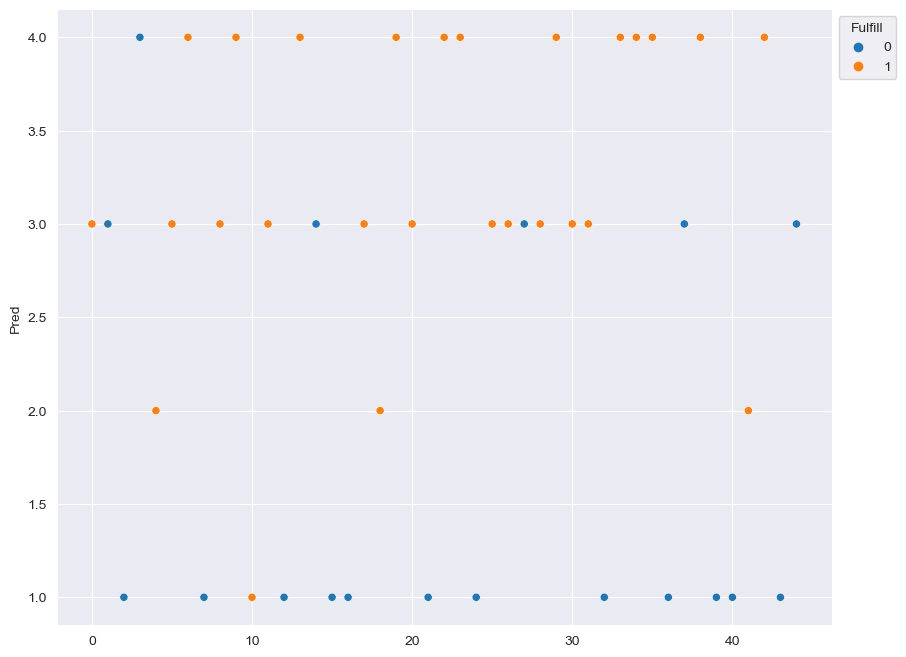

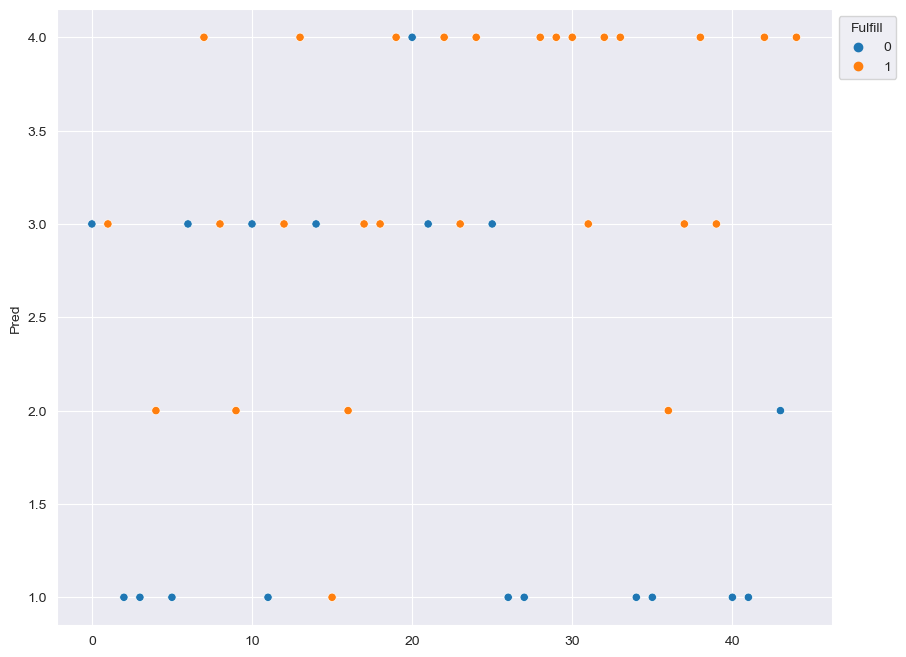

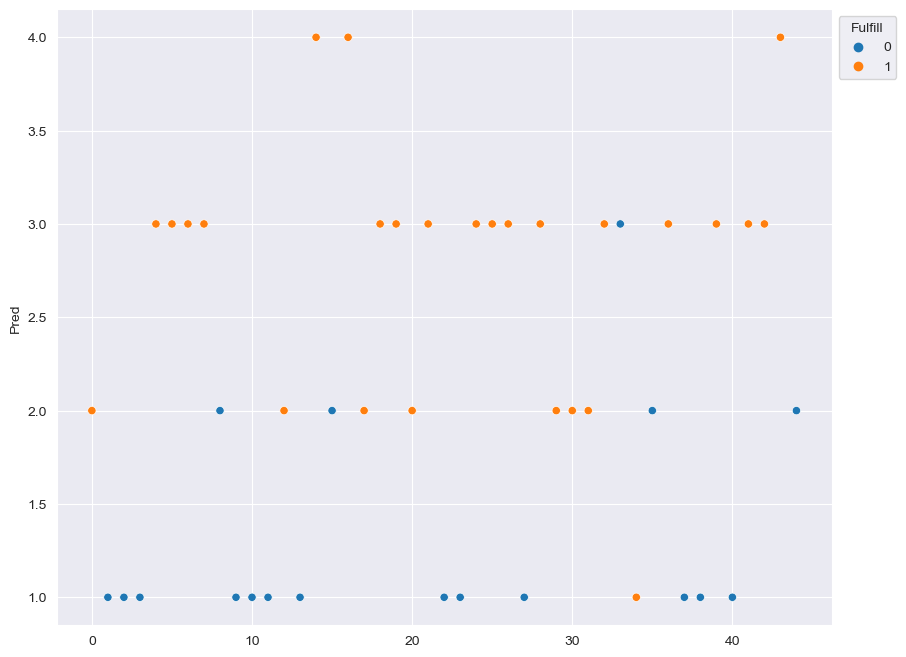

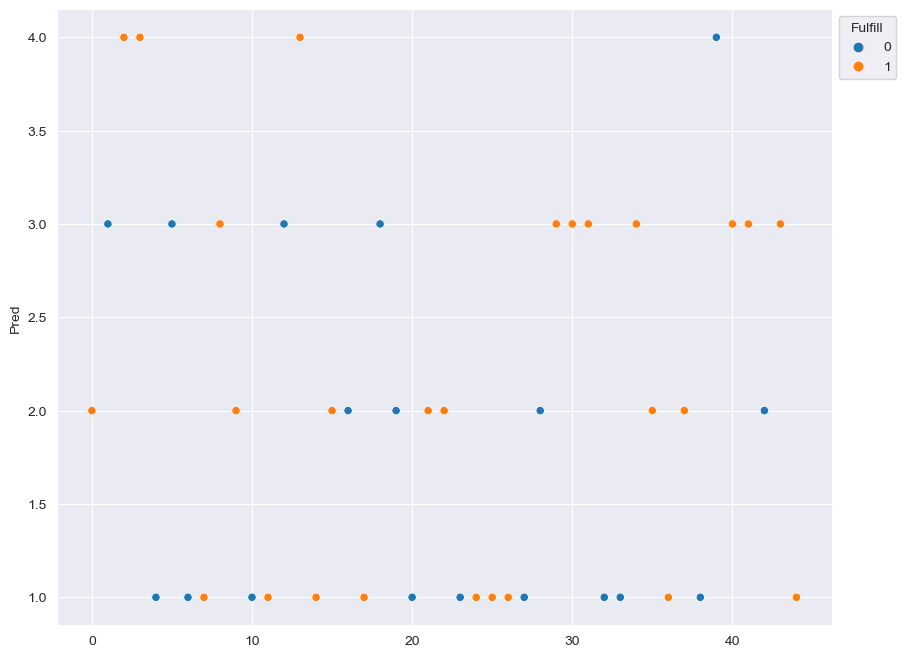

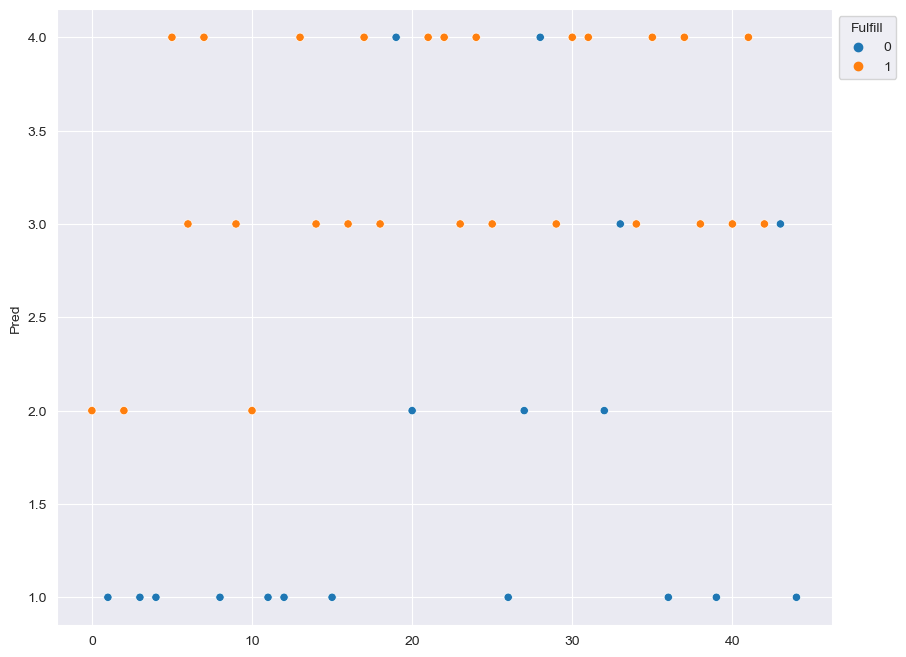

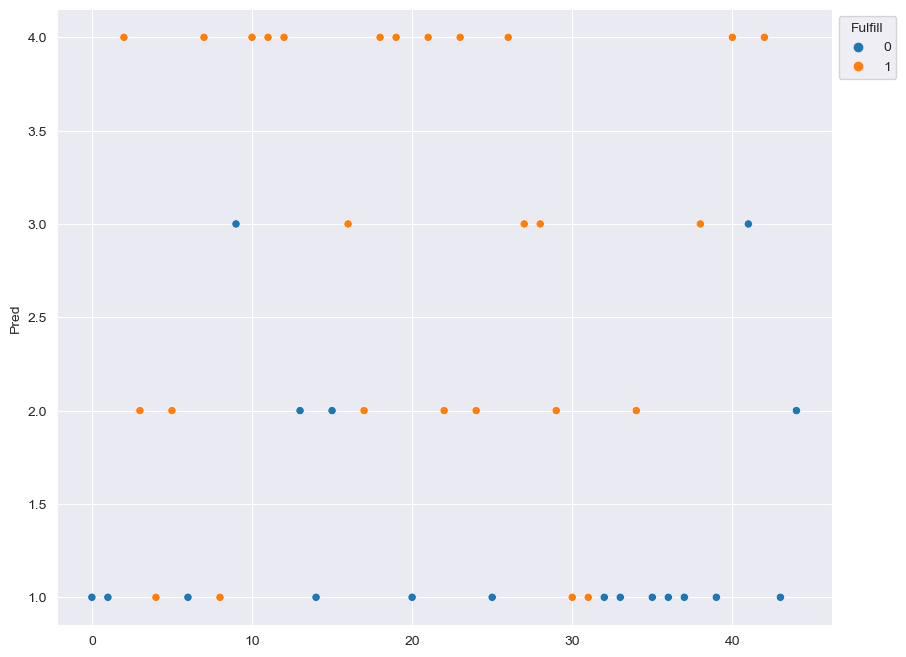

In [190]:
for i,id in enumerate(BEBRASK_dataset.index.values):
    plt.figure(figsize=(10, 8))
    ax = sns.scatterplot(data=subject_dict_all_BEBRASK[id], x=list(range(45)), y="Pred", hue='Fulfill')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.show()
    if i == 5:
        break


#### Exploring the RETOS dataset


In [191]:
subject_dict_all_RETOS = {}
for j in range(0, 95):
    subject = RETOS_dataset.iloc[j]
    id = RETOS_dataset.index.values[j]
    all_trials_pred = []
    all_trials_like = []
    all_trials_facial = []
    all_trials_fulfill = []
    trials_list = []
    
    for i in range(1, 46):
        pred = f'Rating0.RESP_{i}.0'
        like = f'Rating.RESP_{i}.0'
        emotion = f'EvokedEmotion_{i}.0'
        facial = f'Expression_{i}.0'
        fulfill = f'Fulfilled_{i}.0'
        trials = i
        
        if subject[facial] != subject[emotion]:

            all_trials_facial.append(subject[facial] + "_" + subject[emotion])
        else:
            all_trials_facial.append(subject[facial])

        all_trials_pred.append(subject[pred])
        all_trials_like.append(subject[like])
        all_trials_fulfill.append(subject[fulfill])
        trials_list.append(trials)
        
    subject_dict_all_RETOS[id] = {'Pred': np.array(all_trials_pred), 'Like': np.array(all_trials_like),
                            'Facial': np.array(all_trials_facial), 'Fulfill': np.array(all_trials_fulfill), 'Trials': np.array(trials_list)}


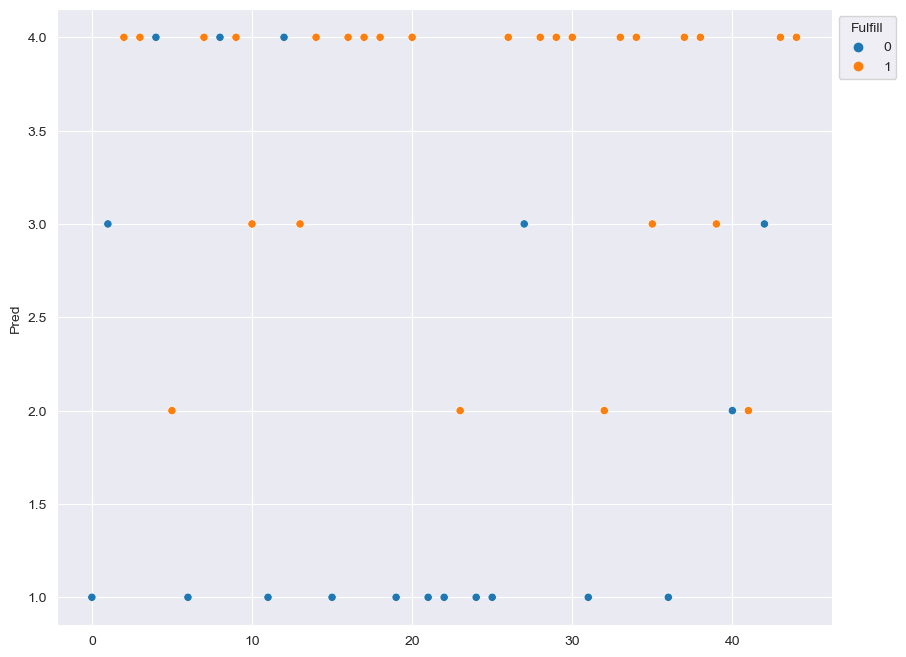

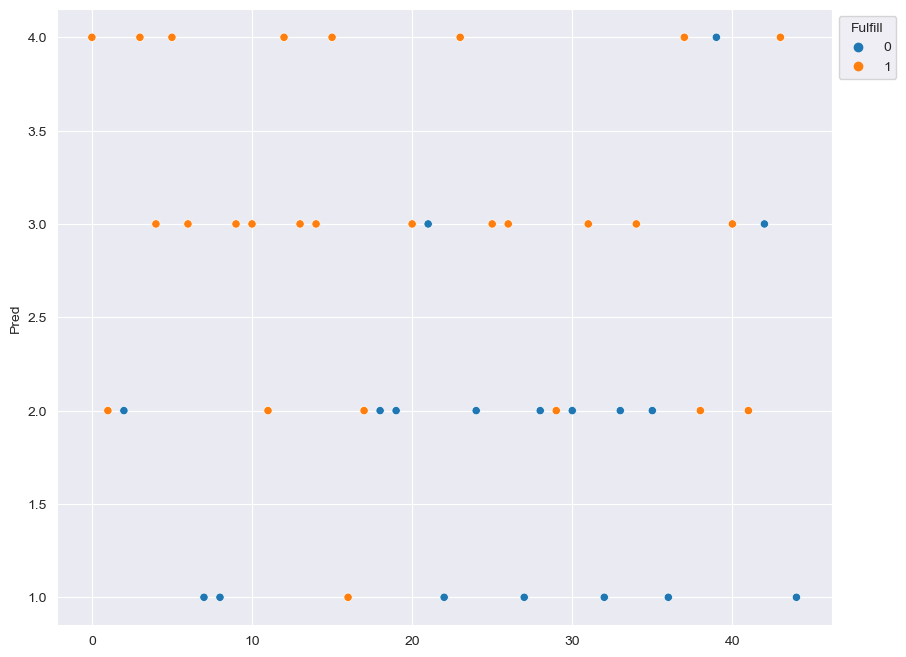

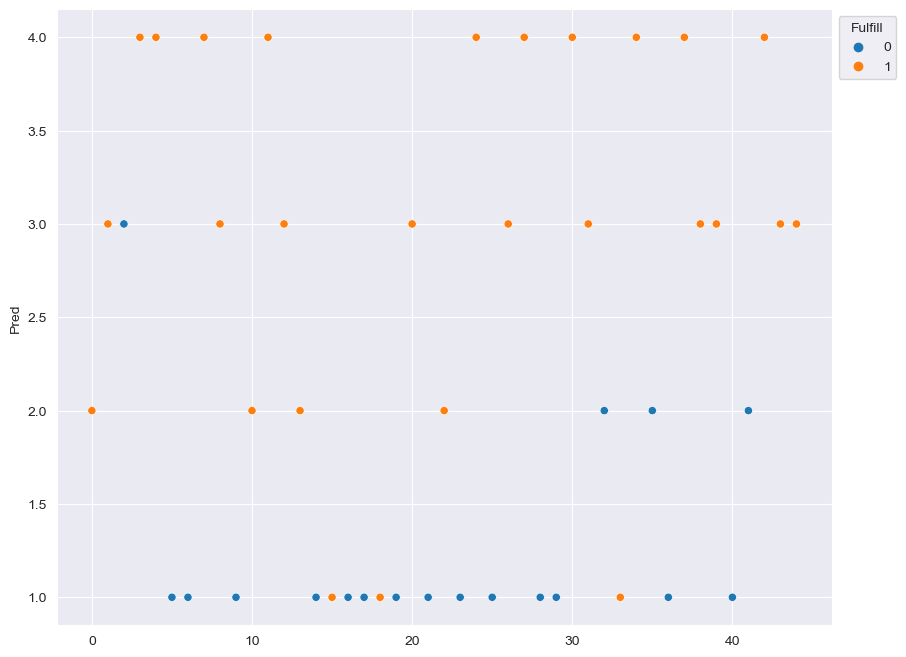

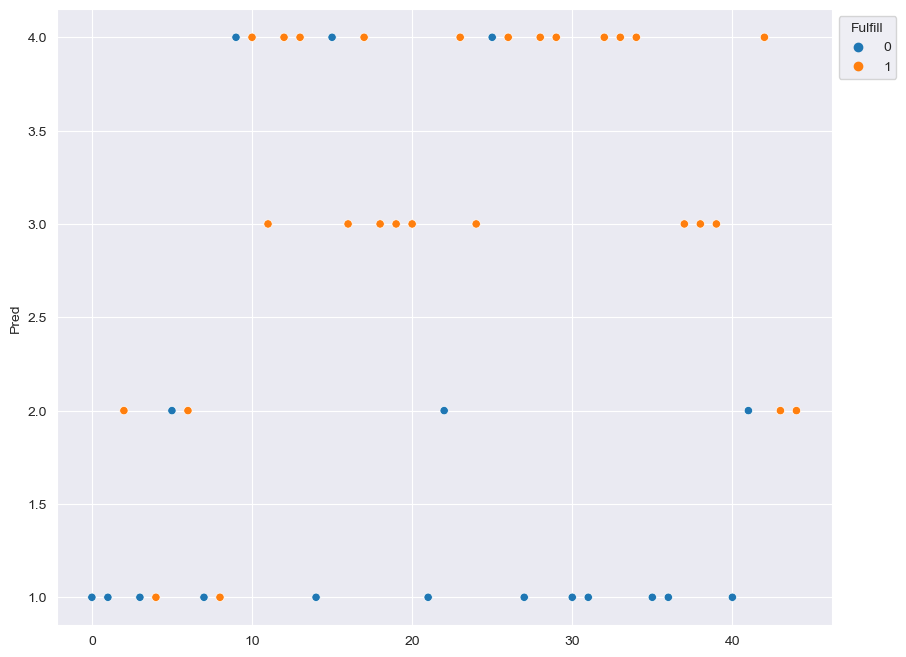

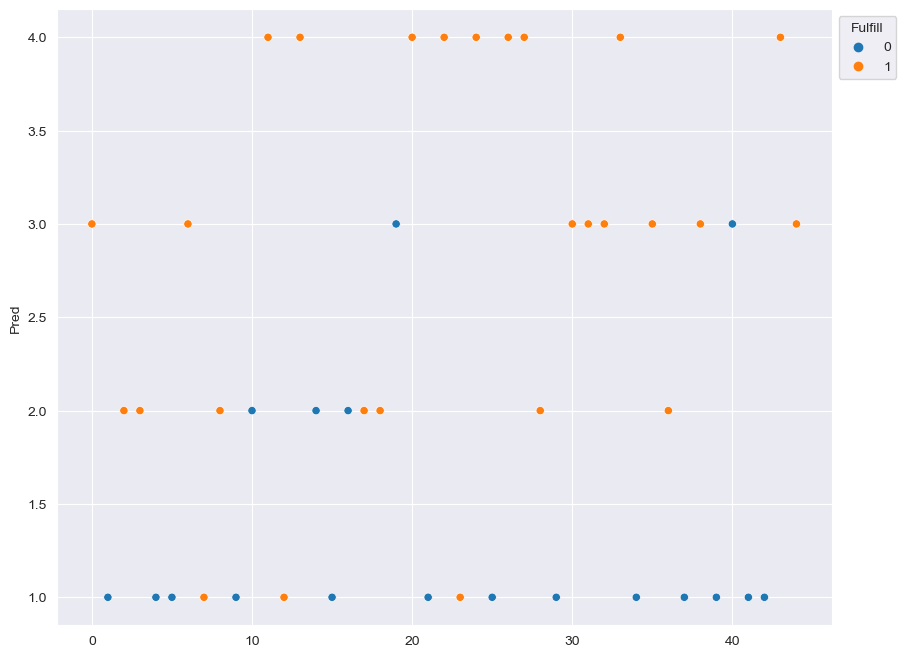

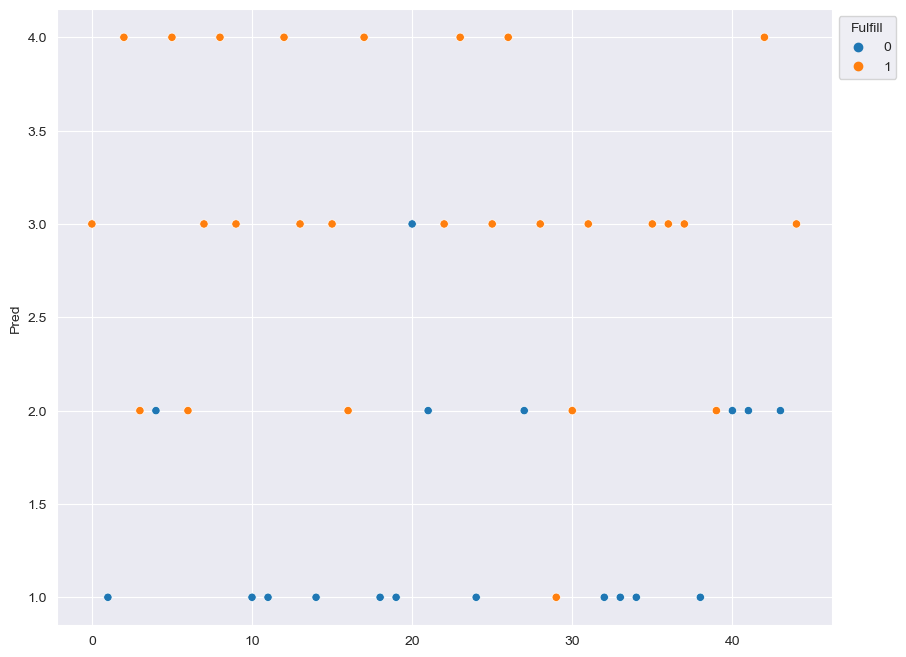

In [192]:
for i,id in enumerate(RETOS_dataset.index.values):
    plt.figure(figsize=(10, 8))
    ax = sns.scatterplot(data=subject_dict_all_RETOS[id], x=list(range(45)), y="Pred", hue='Fulfill')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.show()
    if i == 5:
        break


### Computing Average of Rating0 for each block on raw data

In [193]:
subject_dict_blocks_all = {}
for j in range(0, 150):
    subject = RETOS_BEBRASK_dataset.iloc[j]
    
        
    
    block_mean = subject[i:i+5]
        
        
    subject_dict_blocks_all[subject[0]] = {'Block_1': subject[1:10].mean(), 'Block_2': subject[10:19].mean(),
                                        'Block_3': subject[19:28].mean(), 'Block_4': subject[28:37].mean(),
                                        'Block_5': subject[37:46].mean()}


blocks_dataframe = pd.DataFrame.from_dict(subject_dict_blocks_all,orient='index')

print(f'Mean of block 1: {blocks_dataframe["Block_1"].mean()}')
print(f'Mean of block 2: {blocks_dataframe["Block_2"].mean()}')
print(f'Mean of block 3: {blocks_dataframe["Block_3"].mean()}')
print(f'Mean of block 4: {blocks_dataframe["Block_4"].mean()}')
print(f'Mean of block 5: {blocks_dataframe["Block_5"].mean()}')

Mean of block 1: 2.322962962962963
Mean of block 2: 2.38
Mean of block 3: 2.4237037037037035
Mean of block 4: 2.4074074074074074
Mean of block 5: 2.518518518518518


#### Analysing the number of matches and non-matches per block 

In [194]:
import pandas as pd

# Assuming RETOS_BEBRASK_dataset is your DataFrame and is already defined

# Step 1: Filter the DataFrame to get only the 'Fulfilled' columns
fulfilled_columns = [col for col in RETOS_BEBRASK_dataset.columns if 'Fulfilled' in col]
fulfilled_df = RETOS_BEBRASK_dataset[fulfilled_columns]

# Define the blocks as tuples of (start, end) for column indices
# Adjusting indices to zero-based and ensuring the last index is included in the slice
blocks = [(0, 9), (9, 18), (18, 27), (27, 36), (36, 45)]

# Initialize a dictionary to store the counts
counts_per_block = {}

# Step 2 and 3: Divide into blocks and compute counts
for i, (start, end) in enumerate(blocks, start=1):
    block_df = fulfilled_df.iloc[:, start:end]  # Slice the DataFrame for the current block
    # Count the number of 1s and 0s in the block
    count_1s = (block_df == 1).sum().sum()  # Sum twice to get the total count across all columns
    count_0s = (block_df == 0).sum().sum()  # Sum twice to get the total count across all columns
    counts_per_block[f"Block {i}"] = {"Fulfilled = 1": count_1s, "Fulfilled = 0": count_0s}

# counts_per_block now contains the count of 'Fulfilled' values that are 1 and 0 for each block
counts_per_block


{'Block 1': {'Fulfilled = 1': 815, 'Fulfilled = 0': 535},
 'Block 2': {'Fulfilled = 1': 822, 'Fulfilled = 0': 528},
 'Block 3': {'Fulfilled = 1': 804, 'Fulfilled = 0': 546},
 'Block 4': {'Fulfilled = 1': 793, 'Fulfilled = 0': 557},
 'Block 5': {'Fulfilled = 1': 817, 'Fulfilled = 0': 533}}

### Computing Average of Rating0 for each block on normalized data based on fulfillment (normalizing by each trial number)


In [195]:
RETOS_BEBRASK_dataset.columns

Index(['DataFile.Basename', 'Rating0.RESP_1.0', 'Rating0.RESP_2.0',
       'Rating0.RESP_3.0', 'Rating0.RESP_4.0', 'Rating0.RESP_5.0',
       'Rating0.RESP_6.0', 'Rating0.RESP_7.0', 'Rating0.RESP_8.0',
       'Rating0.RESP_9.0',
       ...
       'Fulfilled_36.0', 'Fulfilled_37.0', 'Fulfilled_38.0', 'Fulfilled_39.0',
       'Fulfilled_40.0', 'Fulfilled_41.0', 'Fulfilled_42.0', 'Fulfilled_43.0',
       'Fulfilled_44.0', 'Fulfilled_45.0'],
      dtype='object', length=271)

In [196]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame and RETOS_BEBRASK_dataset is defined

# Step 1: Collect 'Rating0' values based on 'Fulfilled' segmentation
# Initialize lists to collect values
all_values_where_fulfilled_is_0 = []
all_values_where_fulfilled_is_1 = []

rating_columns = [col for col in RETOS_BEBRASK_dataset.columns if 'Rating0' in col]
fulfilled_columns = [col for col in RETOS_BEBRASK_dataset.columns if 'Fulfilled' in col]


for rating_col, fulfilled_col in zip(rating_columns, fulfilled_columns):
    # Collect values where 'Fulfilled' is 0
    values_where_fulfilled_is_0 = RETOS_BEBRASK_dataset[rating_col][RETOS_BEBRASK_dataset[fulfilled_col] == 0].values
    all_values_where_fulfilled_is_0.extend(values_where_fulfilled_is_0)
    
    # Collect values where 'Fulfilled' is 1
    values_where_fulfilled_is_1 = RETOS_BEBRASK_dataset[rating_col][RETOS_BEBRASK_dataset[fulfilled_col] == 1].values
    all_values_where_fulfilled_is_1.extend(values_where_fulfilled_is_1)

# Step 2: Normalize these collected values collectively
scaler = StandardScaler()

# Ensure there are values to normalize and convert lists to arrays for fitting
if all_values_where_fulfilled_is_0:
    all_values_where_fulfilled_is_0 = scaler.fit_transform(np.array(all_values_where_fulfilled_is_0).reshape(-1, 1)).flatten()
if all_values_where_fulfilled_is_1:
    all_values_where_fulfilled_is_1 = scaler.fit_transform(np.array(all_values_where_fulfilled_is_1).reshape(-1, 1)).flatten()

# Step 3: Reintroduce the normalized values into a copy of the dataset
RETOS_BEBRASK_dataset_normalized = RETOS_BEBRASK_dataset.copy()

# Update logic needs to change since we're handling a combined normalization
for rating_col, fulfilled_col in zip(rating_columns, fulfilled_columns):
    # Indices where 'Fulfilled' is 0 or 1
    indices_0 = RETOS_BEBRASK_dataset_normalized[RETOS_BEBRASK_dataset_normalized[fulfilled_col] == 0].index
    indices_1 = RETOS_BEBRASK_dataset_normalized[RETOS_BEBRASK_dataset_normalized[fulfilled_col] == 1].index
    
    # For each 'Fulfilled' segmentation, reintroduce the normalized values
    if indices_0.any():
        RETOS_BEBRASK_dataset_normalized.loc[indices_0, rating_col] = np.take(all_values_where_fulfilled_is_0, range(len(indices_0)))
    if indices_1.any():
        RETOS_BEBRASK_dataset_normalized.loc[indices_1, rating_col] = np.take(all_values_where_fulfilled_is_1, range(len(indices_1)))


In [197]:
RETOS_BEBRASK_dataset_normalized

,DataFile.Basename,Rating0.RESP_1.0,Rating0.RESP_2.0,Rating0.RESP_3.0,Rating0.RESP_4.0,Rating0.RESP_5.0,Rating0.RESP_6.0,Rating0.RESP_7.0,Rating0.RESP_8.0,Rating0.RESP_9.0,...,Fulfilled_36.0,Fulfilled_37.0,Fulfilled_38.0,Fulfilled_39.0,Fulfilled_40.0,Fulfilled_41.0,Fulfilled_42.0,Fulfilled_43.0,Fulfilled_44.0,Fulfilled_45.0
0,PREDWELL_RETOS-1-1,-0.652884,-0.652884,1.102334,1.102334,-0.652884,1.102334,-0.652884,1.102334,-0.652884,...,1,0,1,1,1,0,1,0,1,1
1,PREDWELL_RETOS-10-1,1.102334,1.102334,-0.652884,-1.024121,1.102334,-1.024121,1.102334,-0.652884,-0.652884,...,0,0,1,1,0,1,1,0,1,0
2,PREDWELL_RETOS-101-1,-1.024121,-1.024121,-0.652884,0.039107,-1.024121,-0.652884,-0.652884,-1.024121,1.102334,...,0,0,1,1,1,0,0,1,1,1
3,PREDWELL_RETOS-102-1,-0.652884,-0.652884,-1.024121,-0.652884,0.039107,-0.652884,-1.024121,-0.652884,-1.024121,...,0,0,1,1,1,0,0,1,1,1
4,PREDWELL_RETOS-103-1,0.039107,-0.652884,0.039107,0.039107,-0.652884,-0.652884,0.039107,0.039107,0.039107,...,1,1,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,PREDWELL_RETOS-1124-1,-1.024121,0.039107,1.102334,-0.652884,-1.024121,1.102334,1.594736,-1.024121,1.102334,...,1,0,0,0,0,1,1,1,0,0
146,PREDWELL_RETOS-1125-1,-0.652884,-1.024121,-1.024121,2.718546,-1.024121,0.470926,-1.024121,1.594736,-1.024121,...,0,0,0,0,1,0,0,1,1,1
147,PREDWELL_RETOS-1126-1,0.470926,-2.087349,-1.024121,0.470926,-1.024121,-1.024121,-2.087349,-2.087349,-2.087349,...,0,0,1,0,0,1,1,1,0,0
148,PREDWELL_RETOS-1127-1,-0.652884,0.039107,0.470926,-2.087349,-0.652884,-1.024121,1.102334,1.102334,-0.652884,...,0,1,1,0,0,0,0,0,1,1


In [198]:
subject_dict_blocks_all = {}
for j in range(0, 150):
    subject = RETOS_BEBRASK_dataset_normalized.iloc[j]

    block_mean = subject[i:i + 5]

    subject_dict_blocks_all[subject[0]] = {'Block_1': subject[1:10].mean(), 'Block_2': subject[10:19].mean(),
                                           'Block_3': subject[19:28].mean(), 'Block_4': subject[28:37].mean(),
                                           'Block_5': subject[37:46].mean()}

blocks_dataframe = pd.DataFrame.from_dict(subject_dict_blocks_all, orient='index')

print(f'Mean of block 1: {blocks_dataframe["Block_1"].mean()}')
print(f'Mean of block 2: {blocks_dataframe["Block_2"].mean()}')
print(f'Mean of block 3: {blocks_dataframe["Block_3"].mean()}')
print(f'Mean of block 4: {blocks_dataframe["Block_4"].mean()}')
print(f'Mean of block 5: {blocks_dataframe["Block_5"].mean()}')

Mean of block 1: -0.2426794515641361
Mean of block 2: -0.24089088322321592
Mean of block 3: -0.2408707031000622
Mean of block 4: -0.23219815098384664
Mean of block 5: -0.241135960189627


### Computing Average of Rating0 for each block on minmax scaled data based on fulfillment

In [199]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame and RETOS_BEBRASK_dataset is defined

# Step 1: Collect 'Rating0' values based on 'Fulfilled' segmentation
# Initialize lists to collect values
all_values_where_fulfilled_is_0 = []
all_values_where_fulfilled_is_1 = []

rating_columns = [col for col in RETOS_BEBRASK_dataset.columns if 'Rating0' in col]
fulfilled_columns = [col for col in RETOS_BEBRASK_dataset.columns if 'Fulfilled' in col]


for rating_col, fulfilled_col in zip(rating_columns, fulfilled_columns):
    # Collect values where 'Fulfilled' is 0
    values_where_fulfilled_is_0 = RETOS_BEBRASK_dataset[rating_col][RETOS_BEBRASK_dataset[fulfilled_col] == 0].values
    all_values_where_fulfilled_is_0.extend(values_where_fulfilled_is_0)
    
    # Collect values where 'Fulfilled' is 1
    values_where_fulfilled_is_1 = RETOS_BEBRASK_dataset[rating_col][RETOS_BEBRASK_dataset[fulfilled_col] == 1].values
    all_values_where_fulfilled_is_1.extend(values_where_fulfilled_is_1)

# Step 2: Normalize these collected values collectively
scaler = MinMaxScaler()

# Ensure there are values to normalize and convert lists to arrays for fitting
if all_values_where_fulfilled_is_0:
    all_values_where_fulfilled_is_0 = scaler.fit_transform(np.array(all_values_where_fulfilled_is_0).reshape(-1, 1)).flatten()
if all_values_where_fulfilled_is_1:
    all_values_where_fulfilled_is_1 = scaler.fit_transform(np.array(all_values_where_fulfilled_is_1).reshape(-1, 1)).flatten()

# Step 3: Reintroduce the normalized values into a copy of the dataset
RETOS_BEBRASK_dataset_scaled = RETOS_BEBRASK_dataset.copy()

# Update logic needs to change since we're handling a combined normalization
for rating_col, fulfilled_col in zip(rating_columns, fulfilled_columns):
    # Indices where 'Fulfilled' is 0 or 1
    indices_0 = RETOS_BEBRASK_dataset_scaled[RETOS_BEBRASK_dataset_scaled[fulfilled_col] == 0].index
    indices_1 = RETOS_BEBRASK_dataset_scaled[RETOS_BEBRASK_dataset_scaled[fulfilled_col] == 1].index
    
    # For each 'Fulfilled' segmentation, reintroduce the normalized values
    if indices_0.any():
        RETOS_BEBRASK_dataset_scaled.loc[indices_0, rating_col] = np.take(all_values_where_fulfilled_is_0, range(len(indices_0)))
    if indices_1.any():
        RETOS_BEBRASK_dataset_scaled.loc[indices_1, rating_col] = np.take(all_values_where_fulfilled_is_1, range(len(indices_1)))


In [200]:
subject_dict_blocks_all = {}
for j in range(0, 150):
    subject = RETOS_BEBRASK_dataset_scaled.iloc[j]

    block_mean = subject[i:i + 5]

    subject_dict_blocks_all[subject[0]] = {'Block_1': subject[1:10].mean(), 'Block_2': subject[10:19].mean(),
                                           'Block_3': subject[19:28].mean(), 'Block_4': subject[28:37].mean(),
                                           'Block_5': subject[37:46].mean()}

blocks_dataframe = pd.DataFrame.from_dict(subject_dict_blocks_all, orient='index')

print(f'Mean of block 1: {blocks_dataframe["Block_1"].mean()}')
print(f'Mean of block 2: {blocks_dataframe["Block_2"].mean()}')
print(f'Mean of block 3: {blocks_dataframe["Block_3"].mean()}')
print(f'Mean of block 4: {blocks_dataframe["Block_4"].mean()}')
print(f'Mean of block 5: {blocks_dataframe["Block_5"].mean()}')

Mean of block 1: 0.3960493827160494
Mean of block 2: 0.3990123456790124
Mean of block 3: 0.3928395061728396
Mean of block 4: 0.39185185185185184
Mean of block 5: 0.39728395061728405


### Computing Average of Rating0 for each block on minmax scaled data inverting scores on False Fulfillment


In [201]:
# Assuming df is your DataFrame and RETOS_BEBRASK_dataset is defined

# Step 1: Invert the scores for 'Fulfilled' = 0
df_copy = RETOS_BEBRASK_dataset.copy()

# Mapping for score inversion
score_inversion_map = {1: 4, 2: 3, 3: 2, 4: 1}

for rating_col, fulfilled_col in zip(rating_columns, fulfilled_columns):
    # Apply inversion mapping where 'Fulfilled' is 0
    # Use .map() for series replacement with a fallback to original values if no change is needed
    df_copy.loc[df_copy[fulfilled_col] == 0, rating_col] = df_copy[rating_col].map(score_inversion_map).fillna(df_copy[rating_col])

# Step 2: Apply Min-Max scaling to all data
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling across all 'Rating0' columns
for rating_col in rating_columns:
    # Reshape for scaler compatibility
    values_to_scale = df_copy[rating_col].values.reshape(-1, 1)
    # Apply scaling
    df_copy[rating_col] = scaler.fit_transform(values_to_scale)

# Now, df_copy contains the inverted scores for 'Fulfilled' = 0 and scaled 'Rating0' values


In [202]:
subject_dict_blocks_all = {}
for j in range(0, 150):
    subject = df_copy.iloc[j]

    block_mean = subject[i:i + 5]

    subject_dict_blocks_all[subject[0]] = {'Block_1': subject[1:10].mean(), 'Block_2': subject[10:19].mean(),
                                           'Block_3': subject[19:28].mean(), 'Block_4': subject[28:37].mean(),
                                           'Block_5': subject[37:46].mean()}

blocks_dataframe = pd.DataFrame.from_dict(subject_dict_blocks_all, orient='index')

print(f'Mean of block 1: {blocks_dataframe["Block_1"].mean()}')
print(f'Mean of block 2: {blocks_dataframe["Block_2"].mean()}')
print(f'Mean of block 3: {blocks_dataframe["Block_3"].mean()}')
print(f'Mean of block 4: {blocks_dataframe["Block_4"].mean()}')
print(f'Mean of block 5: {blocks_dataframe["Block_5"].mean()}')
### Computing Average of Rating0 for each block on minmax scaled data inverting scores on False Fulfillment


Mean of block 1: 0.6886419753086419
Mean of block 2: 0.7093827160493827
Mean of block 3: 0.711111111111111
Mean of block 4: 0.7167901234567902
Mean of block 5: 0.7498765432098766


### Computing Average of raw Rating0 for Non Match and Match

In [203]:
# Identify the 'Rating0' and 'Fulfilled' columns
rating_columns = [col for col in RETOS_BEBRASK_dataset.columns if 'Rating0' in col]
fulfilled_columns = [col for col in RETOS_BEBRASK_dataset.columns if 'Fulfilled' in col]

# Define the blocks as tuples of (start, end) for column indices, adjusted for zero-based indexing
blocks = [(0, 9), (9, 18), (18, 27), (27, 36), (36, 45)]

# Initialize a dictionary to store the mean averages
mean_averages_per_block = {}

for i, (start, end) in enumerate(blocks, start=1):
    # Select the corresponding 'Fulfilled' columns for the block
    fulfilled_block_columns = fulfilled_columns[start:end]
    rating0_block_columns = rating_columns[start:end]
    
    all_values_where_fulfilled_is_0 = []
    all_values_where_fulfilled_is_1 = []
    
    for rating_col, fulfilled_col in zip(rating0_block_columns, fulfilled_block_columns):
        # Collect values where 'Fulfilled' is 0
        values_where_fulfilled_is_0 = RETOS_BEBRASK_dataset[rating_col][RETOS_BEBRASK_dataset[fulfilled_col] == 0].values
        all_values_where_fulfilled_is_0.extend(values_where_fulfilled_is_0)
    
        # Collect values where 'Fulfilled' is 1
        values_where_fulfilled_is_1 = RETOS_BEBRASK_dataset[rating_col][RETOS_BEBRASK_dataset[fulfilled_col] == 1].values
        all_values_where_fulfilled_is_1.extend(values_where_fulfilled_is_1)
    mean_averages_per_block[f"Block {i}, Fulfilled = 0"] = np.mean(all_values_where_fulfilled_is_0)
    mean_averages_per_block[f"Block {i}, Fulfilled = 1"] = np.mean(all_values_where_fulfilled_is_1)
    

In [204]:
mean_averages_per_block

{'Block 1, Fulfilled = 0': 1.5626168224299066,
 'Block 1, Fulfilled = 1': 2.8220858895705523,
 'Block 2, Fulfilled = 0': 1.543560606060606,
 'Block 2, Fulfilled = 1': 2.9172749391727493,
 'Block 3, Fulfilled = 0': 1.6227106227106227,
 'Block 3, Fulfilled = 1': 2.9676616915422884,
 'Block 4, Fulfilled = 0': 1.5996409335727109,
 'Block 4, Fulfilled = 1': 2.9747793190416143,
 'Block 5, Fulfilled = 0': 1.574108818011257,
 'Block 5, Fulfilled = 1': 3.134638922888617}

## Analysing the trend of the TimeSeries

### Trend without differentiating Match and No Match

In [205]:
subject_id = RETOS_BEBRASK_dataset.iloc[:,0]
subject_timeseries = RETOS_BEBRASK_dataset.iloc[:,1:46]

In [206]:
subject_timeseries

,Rating0.RESP_1.0,Rating0.RESP_2.0,Rating0.RESP_3.0,Rating0.RESP_4.0,Rating0.RESP_5.0,Rating0.RESP_6.0,Rating0.RESP_7.0,Rating0.RESP_8.0,Rating0.RESP_9.0,Rating0.RESP_10.0,...,Rating0.RESP_36.0,Rating0.RESP_37.0,Rating0.RESP_38.0,Rating0.RESP_39.0,Rating0.RESP_40.0,Rating0.RESP_41.0,Rating0.RESP_42.0,Rating0.RESP_43.0,Rating0.RESP_44.0,Rating0.RESP_45.0
0,1,3,4,4,4,2,1,4,4,4,...,3,1,4,4,3,2,2,3,4,4
1,4,2,2,4,3,4,3,1,1,3,...,2,1,4,2,4,3,2,3,4,1
2,2,3,3,4,4,1,1,4,3,1,...,2,1,4,3,3,1,2,4,3,3
3,1,1,2,1,1,2,2,1,1,4,...,1,1,3,3,3,1,2,4,2,2
4,3,1,2,2,1,1,3,1,2,1,...,3,2,1,3,1,3,1,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2,2,3,1,3,3,1,1,2,2,...,2,2,3,1,1,1,3,2,2,2
146,1,3,3,3,3,1,4,1,2,2,...,1,1,3,1,3,2,2,4,3,1
147,2,3,4,1,4,4,4,4,4,4,...,1,1,4,4,1,4,4,4,1,3
148,1,3,2,3,1,4,4,4,1,3,...,2,4,4,2,3,1,2,1,2,2


In [207]:
# Initialize an array to store the slopes (trends) for each subject
slopes = np.zeros(subject_timeseries.shape[0])
intercepts = np.zeros(subject_timeseries.shape[0])

# Time stamps as the independent variable
# Assuming equally spaced time stamps and starting from 1 for simplicity
X = np.arange(1, subject_timeseries.shape[1] + 1)

# Loop over each subject to fit a linear model and extract the slope
for i in range(subject_timeseries.shape[0]):
    Y = subject_timeseries.iloc[i, :].values  # Time series values for the current subject
    slope, intercept = np.polyfit(X, Y, 1)  # Fit a linear model
    
    slopes[i] = slope  # Store the slope
    intercepts[i] = intercept
# Now, 'slopes' contains the trend of each time series (each subject in your dataset)
# You can add this information back to your DataFrame or analyze it separately

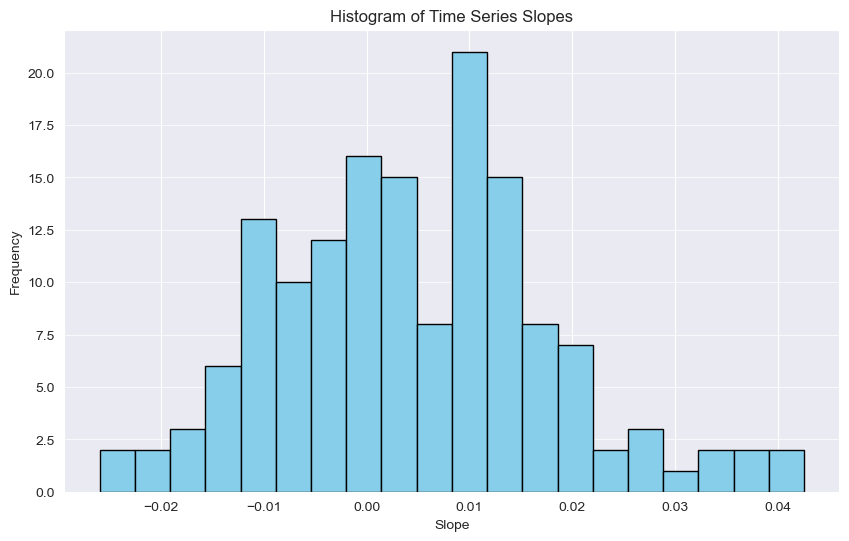

In [208]:
plt.figure(figsize=(10, 6))
plt.hist(slopes, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Time Series Slopes')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

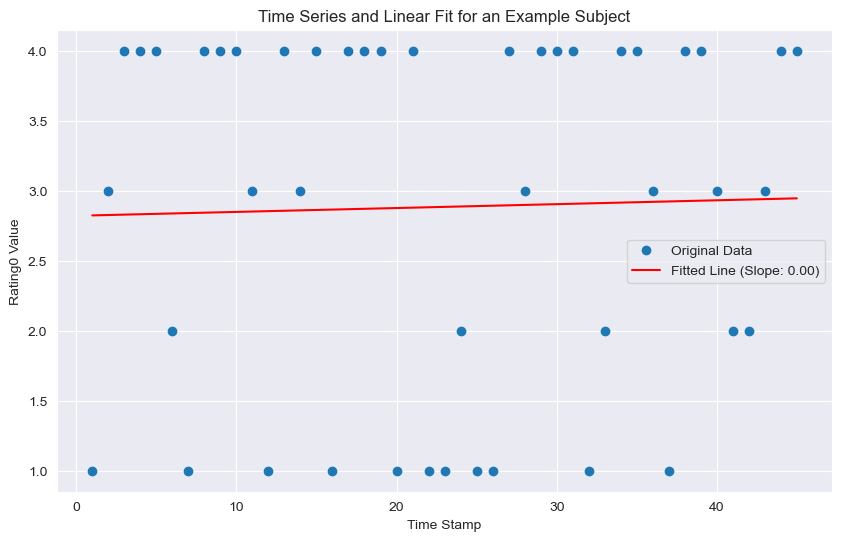

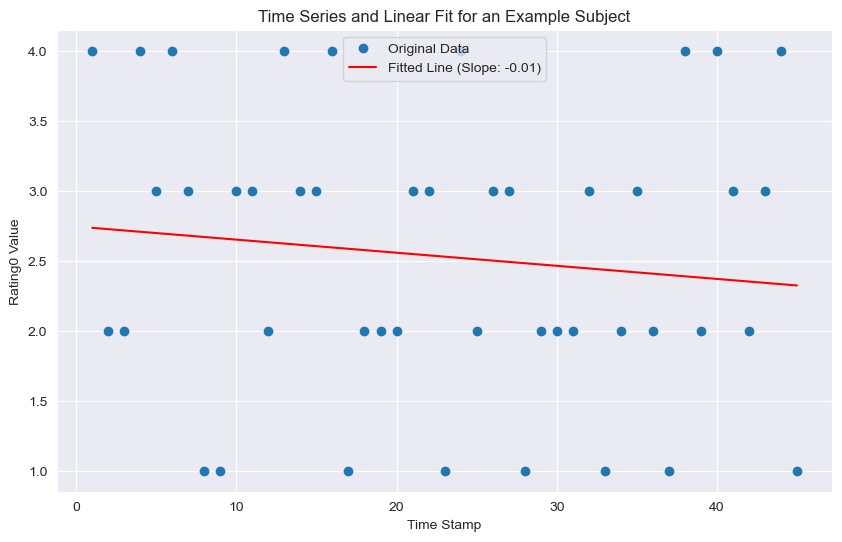

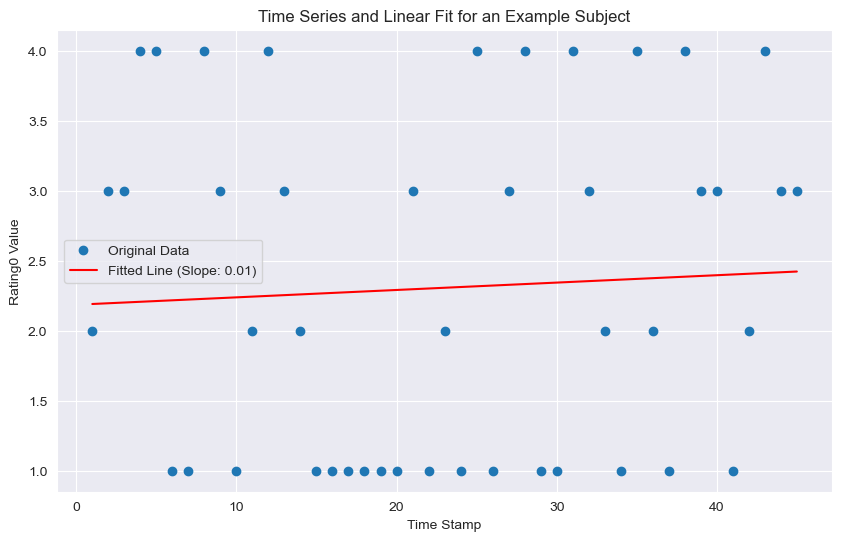

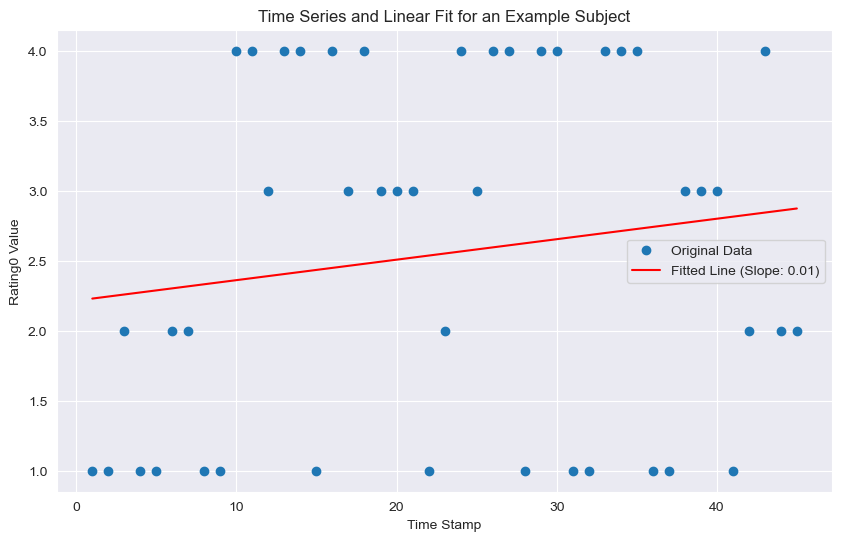

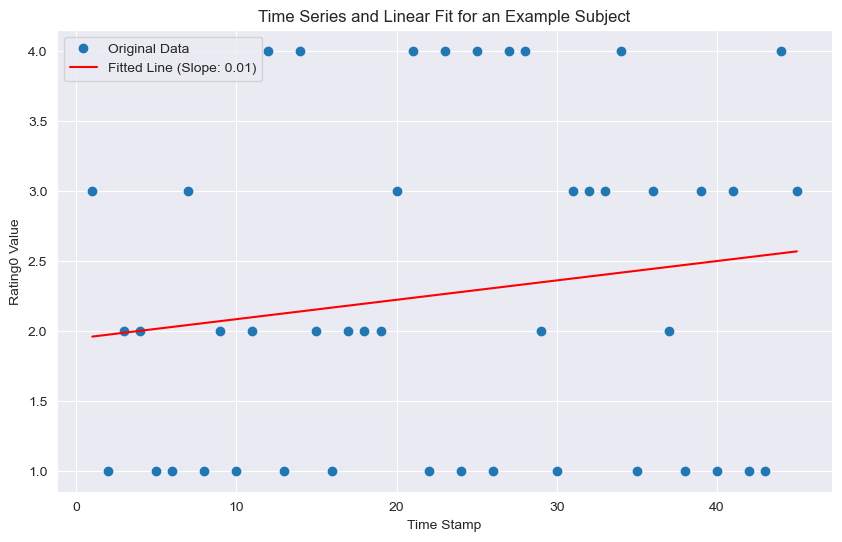

In [209]:
for i in range(0,5):

    Y_fitted = slopes[i] * X + intercepts[i]
    
    plt.figure(figsize=(10, 6))
    plt.plot(X, subject_timeseries.iloc[i], 'o', label='Original Data')
    plt.plot(X, Y_fitted, 'r', label=f'Fitted Line (Slope: {slopes[i]:.2f})')
    plt.title('Time Series and Linear Fit for an Example Subject')
    plt.xlabel('Time Stamp')
    plt.ylabel('Rating0 Value')
    plt.legend()
    plt.show()

### Trend differentiating Match and No Match

In [210]:
rating_columns = [col for col in RETOS_BEBRASK_dataset.columns if 'Rating0' in col]
fulfilled_columns = [col for col in RETOS_BEBRASK_dataset.columns if 'Fulfilled' in col]


In [211]:

import numpy as np  # Ensure numpy is imported for NaN

# Assuming RETOS_BEBRASK_dataset, fulfilled_columns, and rating_columns are already defined

# Initialize two empty DataFrames with specific dimensions
subjects = RETOS_BEBRASK_dataset.index
df_fulfilled_1 = pd.DataFrame(index=subjects, columns=[f"Time_{i+1}" for i in range(30)])
df_fulfilled_0 = pd.DataFrame(index=subjects, columns=[f"Time_{i+1}" for i in range(20)])

# Iterate through each subject
for subject in subjects:
    # Initialize empty lists for 'Fulfilled' = 1 and 'Fulfilled' = 0
    ratings_1 = []
    ratings_0 = []
    
    # Iterate through each 'Fulfilled' and 'Rating0' column pair
    for fulfilled_col, rating_col in zip(fulfilled_columns, rating_columns):
        # Check the 'Fulfilled' status and append the 'Rating0' value to the respective list
        if RETOS_BEBRASK_dataset.loc[subject, fulfilled_col] == 1:
            ratings_1.append(RETOS_BEBRASK_dataset.loc[subject, rating_col])
        elif RETOS_BEBRASK_dataset.loc[subject, fulfilled_col] == 0:
            ratings_0.append(RETOS_BEBRASK_dataset.loc[subject, rating_col])
    
    # Extend ratings_1 with NaN values if its length is not 30
    if len(ratings_1) < 30:
        ratings_1.extend([np.nan] * (30 - len(ratings_1)))
        
    # Extend ratings_0 with NaN values if its length is not 20
    if len(ratings_0) < 20:
        ratings_0.extend([np.nan] * (20 - len(ratings_0)))
    
    # Insert the list values into their respective DataFrame for the current subject
    df_fulfilled_1.loc[subject, :] = ratings_1[:30]  # Ensuring the list length matches the DataFrame's column length
    df_fulfilled_0.loc[subject, :] = ratings_0[:20]  # Ensuring the list length matches the DataFrame's column length



In [212]:
# Initialize an array to store the slopes (trends) for each subject
slopes = np.zeros(df_fulfilled_1.shape[0])
intercepts = np.zeros(df_fulfilled_1.shape[0])

# Original time stamps as the independent variable
X_original = np.arange(1, df_fulfilled_1.shape[1] + 1)

# Loop over each subject to fit a linear model and extract the slope
for i in range(df_fulfilled_1.shape[0]):
    # Time series values for the current subject, dropping NaNs
    Y = df_fulfilled_1.iloc[i, :].dropna().values
    
    # Ensure Y is of numeric type
    Y = pd.to_numeric(Y, errors='coerce').astype('float64')
    
    # Filter X based on the non-NaN entries of Y to maintain correspondence
    X_filtered = X_original[~df_fulfilled_1.iloc[i, :].isna()]
    
    # Ensure X_filtered is of numeric type
    X_filtered = pd.to_numeric(X_filtered, errors='coerce').astype('float64')

    # Check again after conversion to avoid fitting a model with insufficient data
    if len(Y) > 1 and not np.isnan(Y).all():
        slope, intercept = np.polyfit(X_filtered, Y, 1)  # Fit a linear model
        slopes[i] = slope  # Store the slope
        intercepts[i] = intercept
    else:
        slopes[i] = np.nan  # Assign NaN if not enough data points or if conversion resulted in NaNs
        intercepts[i] = np.nan
    
# 'slopes' now contains the trend of each time series for each subject in your dataset



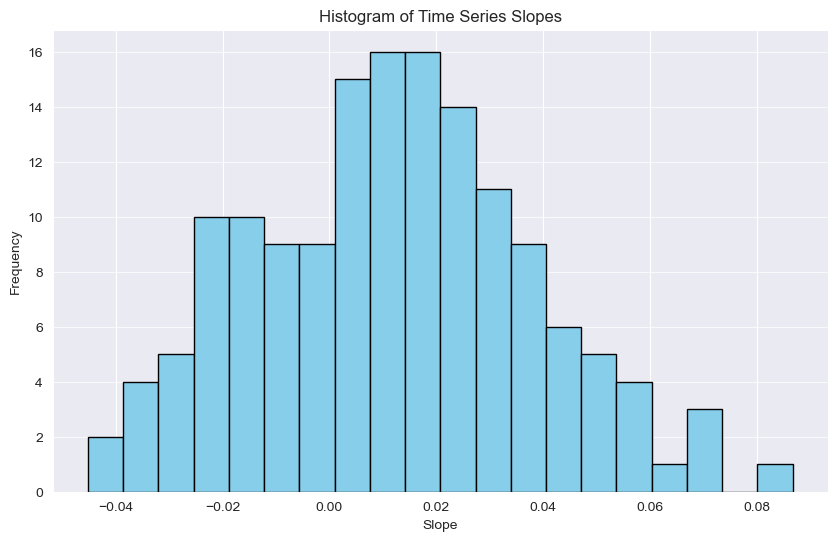

In [213]:
plt.figure(figsize=(10, 6))
plt.hist(slopes, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Time Series Slopes')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()
### Trend differentiating Match and No Match

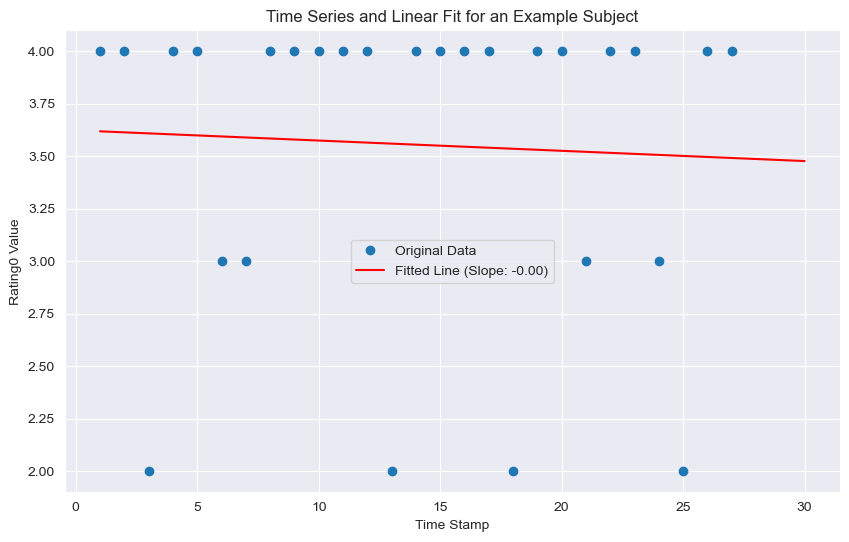

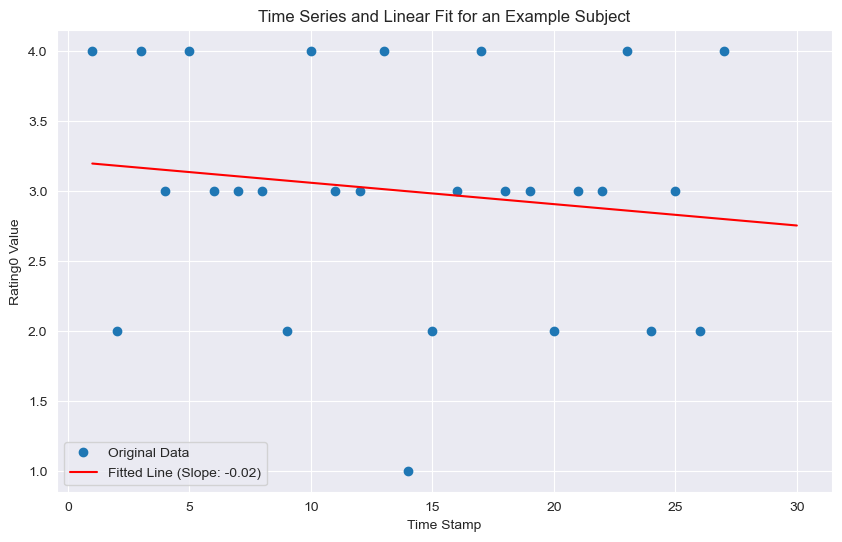

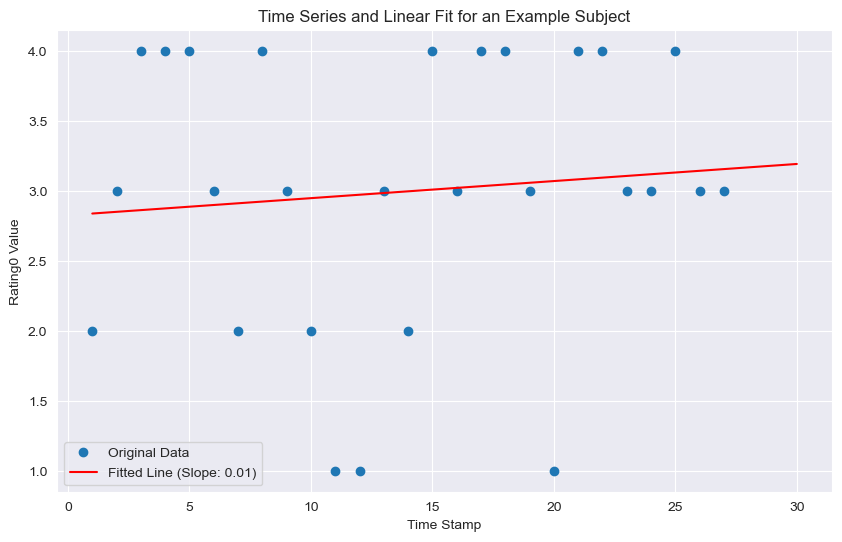

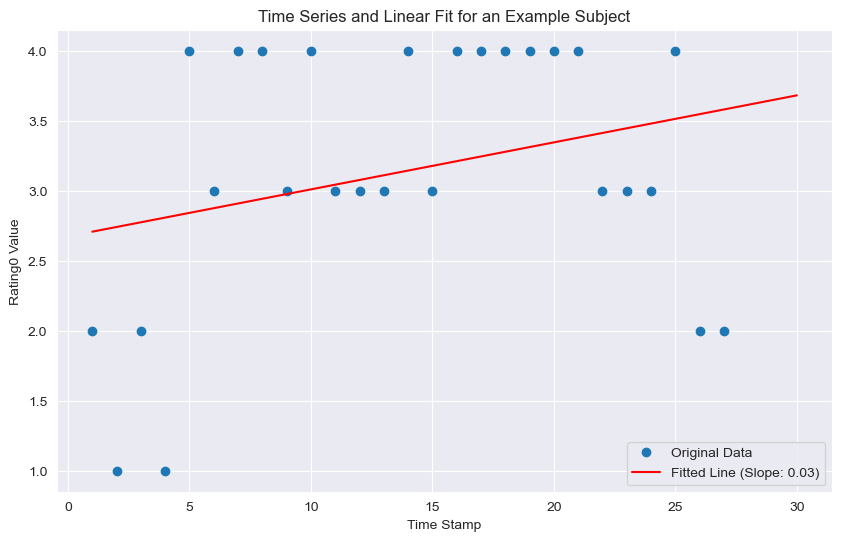

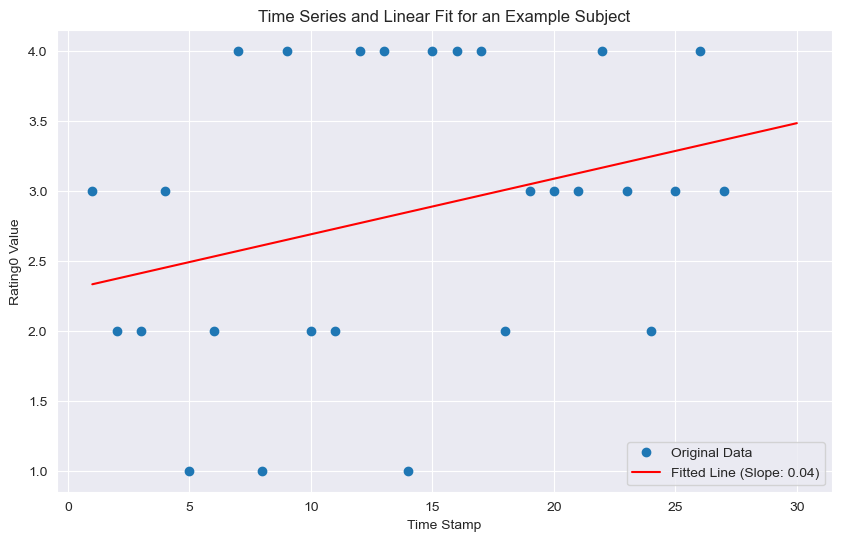

In [214]:
for i in range(0,5):
    X = np.arange(1, len(df_fulfilled_1.iloc[i]) + 1)
    Y_fitted = slopes[i] * X + intercepts[i]
    
    plt.figure(figsize=(10, 6))
    plt.plot(X, df_fulfilled_1.iloc[i], 'o', label='Original Data')
    plt.plot(X, Y_fitted, 'r', label=f'Fitted Line (Slope: {slopes[i]:.2f})')
    plt.title('Time Series and Linear Fit for an Example Subject')
    plt.xlabel('Time Stamp')
    plt.ylabel('Rating0 Value')
    plt.legend()
    plt.show()


In [215]:
# Initialize an array to store the slopes (trends) for each subject
slopes = np.zeros(df_fulfilled_0.shape[0])
intercepts = np.zeros(df_fulfilled_1.shape[0])

# Original time stamps as the independent variable
X_original = np.arange(1, df_fulfilled_0.shape[1] + 1)

# Loop over each subject to fit a linear model and extract the slope
for i in range(df_fulfilled_1.shape[0]):
    # Time series values for the current subject, dropping NaNs
    Y = df_fulfilled_0.iloc[i, :].dropna().values
    
    # Ensure Y is of numeric type
    Y = pd.to_numeric(Y, errors='coerce').astype('float64')
    
    # Filter X based on the non-NaN entries of Y to maintain correspondence
    X_filtered = X_original[~df_fulfilled_0.iloc[i, :].isna()]
    
    # Ensure X_filtered is of numeric type
    X_filtered = pd.to_numeric(X_filtered, errors='coerce').astype('float64')

    # Check again after conversion to avoid fitting a model with insufficient data
    if len(Y) > 1 and not np.isnan(Y).all():
        slope, intercept = np.polyfit(X_filtered, Y, 1)  # Fit a linear model
        slopes[i] = slope  # Store the slope
        intercepts[i] = intercept

    else:
        slopes[i] = np.nan  # Assign NaN if not enough data points or if conversion resulted in NaNs
        intercept[i] = np.nan

# 'slopes' now contains the trend of each time series for each subject in your dataset



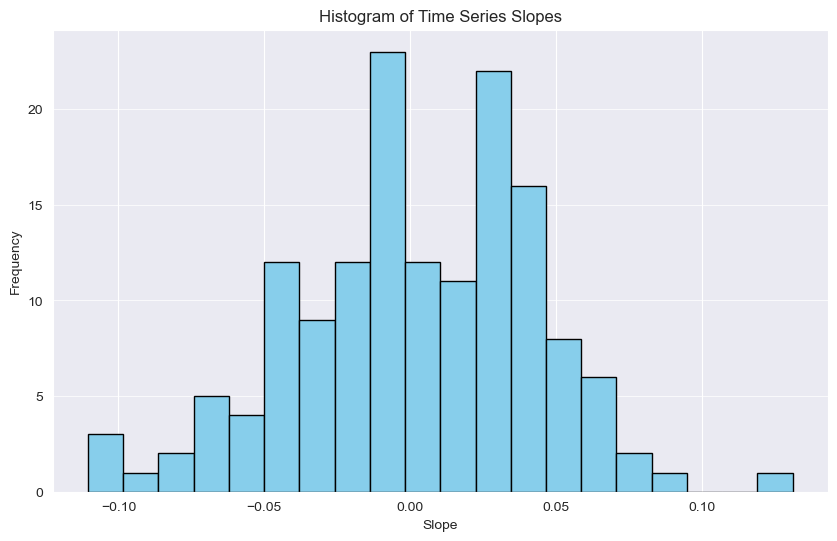

In [216]:
plt.figure(figsize=(10, 6))
plt.hist(slopes, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Time Series Slopes')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

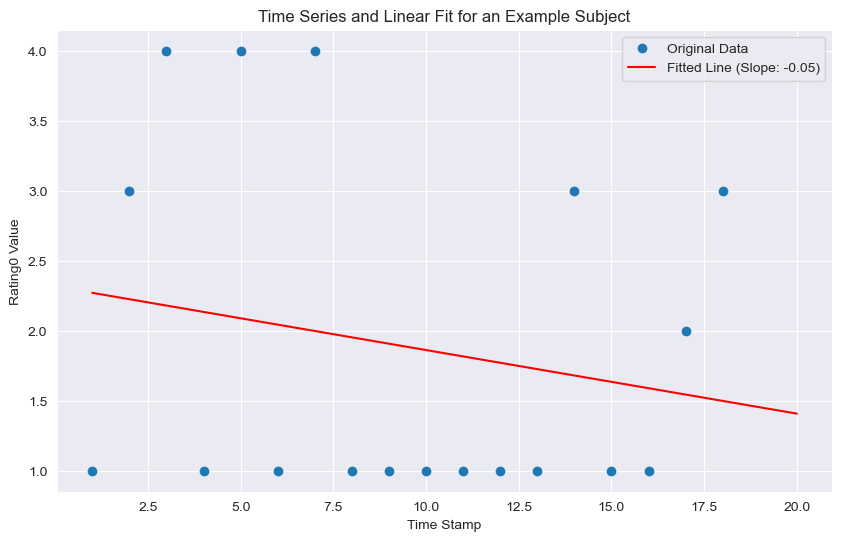

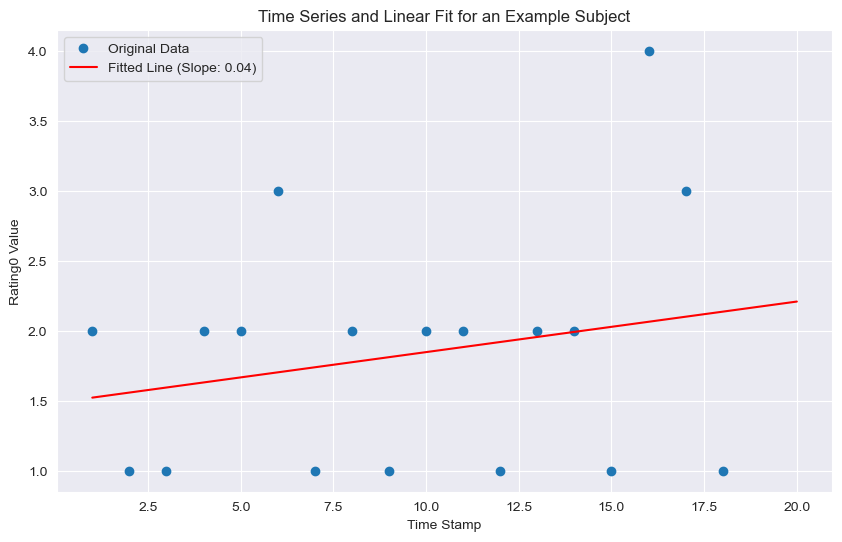

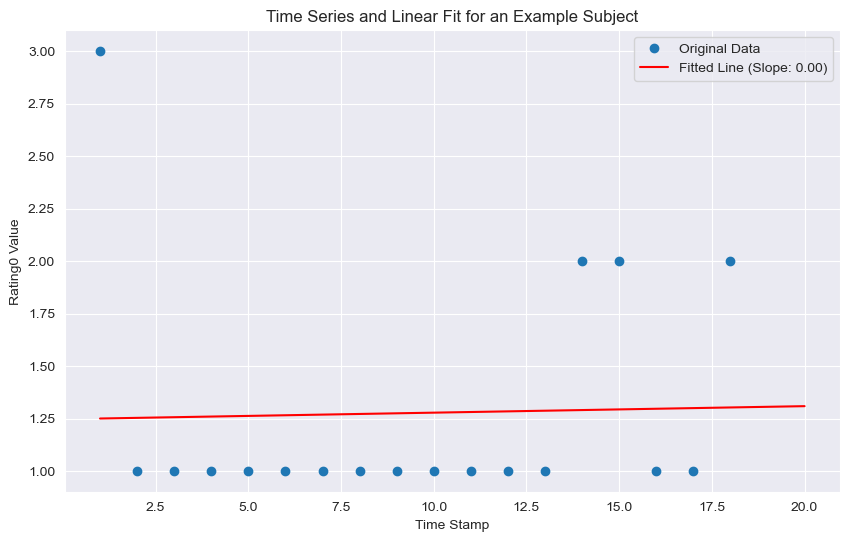

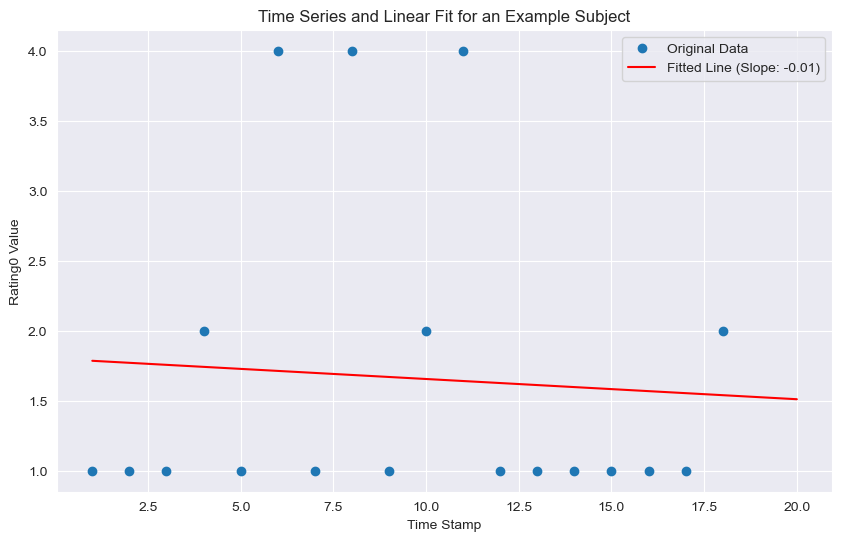

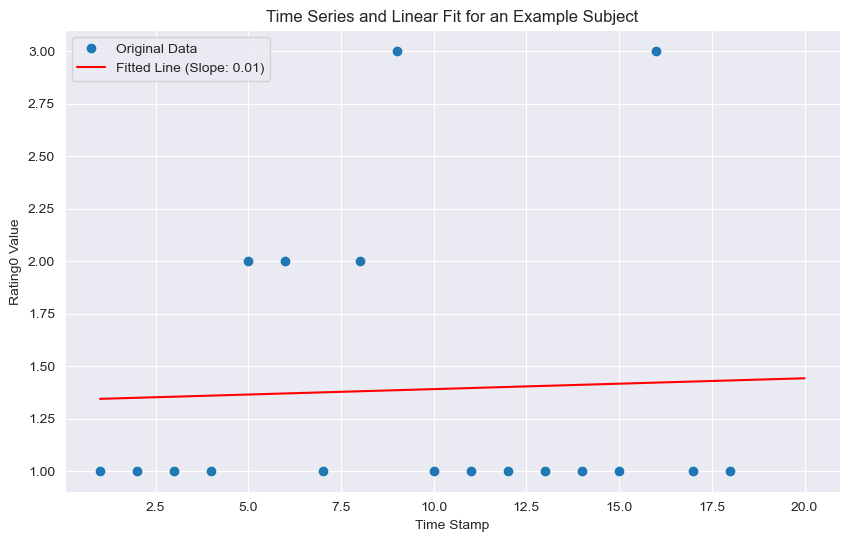

In [217]:
for i in range(0,5):
    X = np.arange(1, len(df_fulfilled_0.iloc[i]) + 1)
    Y_fitted = slopes[i] * X + intercepts[i]
    
    plt.figure(figsize=(10, 6))
    plt.plot(X, df_fulfilled_0.iloc[i], 'o', label='Original Data')
    plt.plot(X, Y_fitted, 'r', label=f'Fitted Line (Slope: {slopes[i]:.2f})')
    plt.title('Time Series and Linear Fit for an Example Subject')
    plt.xlabel('Time Stamp')
    plt.ylabel('Rating0 Value')
    plt.legend()
    plt.show()